63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Accuracy: 95.45%
              precision    recall  f1-score   support

       anger       0.94      0.96      0.95       275
        fear       0.93      0.96      0.95       224
         joy       0.96      0.97      0.96       695
        love       0.93      0.86      0.89       159
     sadness       0.97      0.97      0.97       581
    surprise       0.93      0.82      0.87        66

    accuracy                           0.95      2000
   macro avg       0.94      0.92      0.93      2000
weighted avg       0.95      0.95      0.95      2000



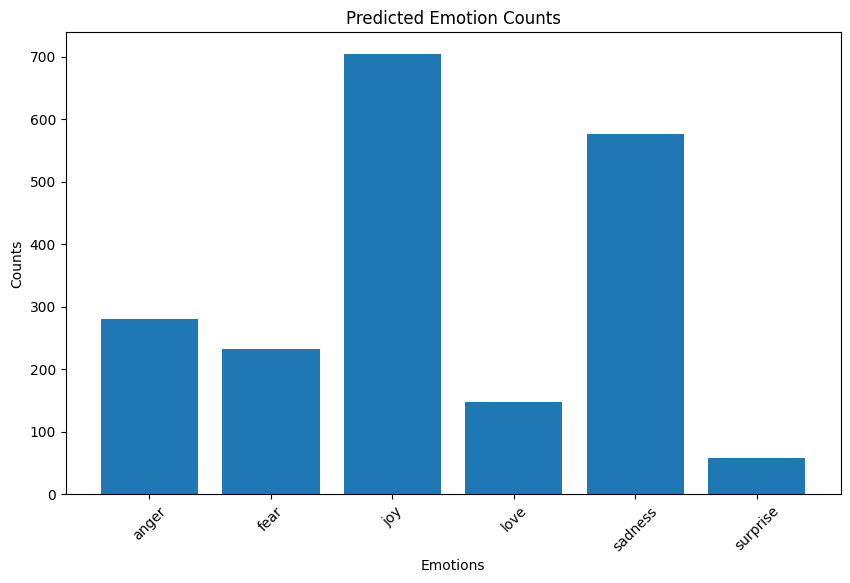

In [1]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import CountVectorizer
from tensorflow.keras.models import load_model
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re

# Load the saved model, label encoder, and CountVectorizer
model = joblib.load('emotion_detection_model.joblib')
cv = joblib.load('count_vectorizer.joblib')
label_encoder = joblib.load('label_encoder.joblib')

# Load test data
test = pd.read_table('test.txt', delimiter=";", header=None)
test.columns = ["text", "label"]

# Preprocess function
porter = PorterStemmer()
def preprocess(line):
    review = re.sub("[^a-zA-z]", " ", line)
    review = review.lower()
    review = review.split()
    review = [porter.stem(word) for word in review if not word in stopwords.words("english")]
    return " ".join(review)

# Apply preprocessing to test data
test["text"] = test["text"].apply(lambda x: preprocess(x))

# Encode labels
y_test = label_encoder.transform(test["label"])

# Vectorize text
x_test_cv = cv.transform(test["text"]).toarray()

# Predict using the model
y_pred = model.predict(x_test_cv)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_classes)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Print classification report
print(classification_report(y_test, y_pred_classes, target_names=label_encoder.classes_))

# Since we don't have a training history for evaluation, we'll visualize the counts of each predicted class
unique, counts = np.unique(y_pred_classes, return_counts=True)
predicted_counts = dict(zip(label_encoder.classes_, counts))

plt.figure(figsize=(10, 6))
plt.bar(predicted_counts.keys(), predicted_counts.values())
plt.title('Predicted Emotion Counts')
plt.xlabel('Emotions')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.show()
